In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.formula.api as smf

In [6]:
Data = pd.read_csv("D:\ds\ASSIGNMENTS_SELFPACED\ASSIGNMENT_04\Salary_Data.csv")
Data.describe()#EDA

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
ye = Data.YearsExperience # The independent variable

In [9]:
sal = Data.Salary # The dependent variable

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

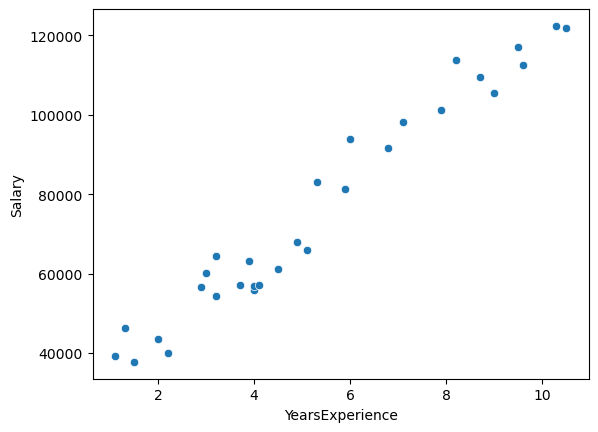

In [10]:
sns.scatterplot(data=Data, x="YearsExperience", y="Salary")

In [11]:
np.corrcoef(ye,sal)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [12]:
model = smf.ols( "sal~ye",data=Data).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        00:33:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

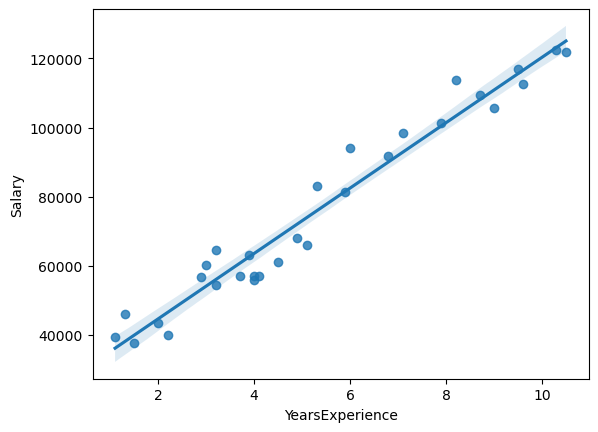

In [14]:
sns.regplot(data=Data, x="YearsExperience", y="Salary")

In [15]:
model.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [16]:
to_predict = pd.Series([3,6.8,5.7564])

In [17]:
# prediction value
salary_prediction = pd.DataFrame(to_predict,columns=['ye'])
salary_prediction

,ye
0,3.0000
1,6.8000
2,5.7564


In [18]:
model.predict(salary_prediction)

0    54142.087163
1    90051.943985
2    80189.963306
dtype: float64

In [19]:
# AS R^2  > 75% (95.7% in this case) prediction model is not modified further